# **Model card**

References:

https://www.tensorflow.org/responsible_ai/model_card_toolkit/guide

In [ ]:
!pip install -q --upgrade pip==20.2
!pip install -q 'model-card-toolkit>=0.1.1,<0.2'
!pip install -q 'tensorflow>=2.3.1'

In [1]:
import tensorflow as tf
import numpy as np
from model_card_toolkit import ModelCardToolkit
from model_card_toolkit.documentation.examples import cats_vs_dogs
from model_card_toolkit.utils.graphics import figure_to_base64str
import tempfile
import matplotlib.pyplot as plt
from IPython import display
import requests
import os
import zipfile

In [2]:
model_card_dir = tempfile.mkdtemp()
mct = ModelCardToolkit(model_card_dir)
model_card = mct.scaffold_assets()

In [3]:
model_card.model_details.name = 'Chest X-ray view position simple classifier'
model_card.model_details.overview = (
    'This model distinguishes PA, AP, AP Supine and lateral views in X-rays. '
    'It uses the AutoKeras tool, that automatically set the best model and '
    'parameters. In this case it created a convolutional neural network. '
    'It was trained on the `COVID-19 image data collection` '
    '(https://github.com/ieee8023/covid-chestxray-dataset). This model '
    'performed with medium accuracy, but the metrics weren\'t explored too much.'
)
model_card.model_details.owners = [
  {'name': 'Amanda Furtado Brinhosa', 'contact': '@amandafbri'}
]
model_card.model_details.version = {'name': 'v1.0', 'date': '04/04/2021'}
model_card.model_details.references = [
    'hhttps://github.com/ieee8023/covid-chestxray-dataset',
    'https://autokeras.com/image_classifier/',
]
model_card.model_details.citation = 'https://github.com/amandafbri/xray-view-position-classifier'

In [6]:
model_card.quantitative_analysis.performance_metrics = [
  {'type': 'Validation accuracy', 'value': 0.7558},
  {'type': 'Validation AUC', 'value': 0.8957},
]

In [9]:
model_card.considerations.use_cases = [
    'This model classifies X-ray images with different positions (PA, AP, AP Supine and Lateral).'
]
model_card.considerations.limitations = [
    'This model is not able to classify X-rays images of other classes.'
]
model_card.considerations.ethical_considerations = [{
    'name':
        'This model cannot be used in real applications, since it does not '
        'consider all types of views and does not have high metrics. The '
        'model is for studying AI purposes, not medical.',
    'mitigation_strategy':
        'Avoid application on real applications.'
}]

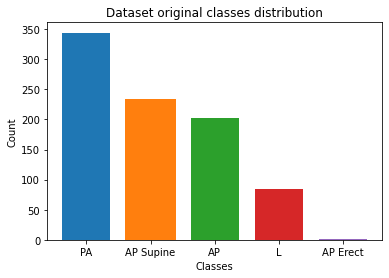

In [15]:
fig, ax = plt.subplots()
width = 0.75
rects0 = ax.bar(0, 344, width, label='PA')
rects1 = ax.bar(1, 234, label='AP Supine')
rects2 = ax.bar(2, 203, width, label='AP')
rects3 = ax.bar(3, 84, width, label='L')
rects4 = ax.bar(4, 1, width, label='AP Erect')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(['PA', 'AP Supine', 'AP', 'L', 'AP Erect'])
ax.set_ylabel('Count')
ax.set_xlabel('Classes')
ax.set_title('Dataset original classes distribution')
original_dataset = figure_to_base64str(fig)

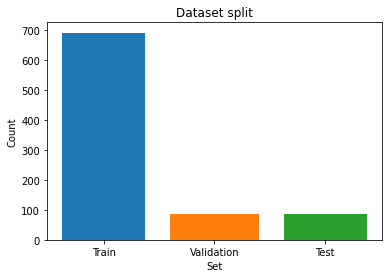

In [41]:
# Train, val, test
# Found 692 files belonging to 4 classes.
# Found 86 files belonging to 4 classes.
# Found 87 files belonging to 4 classes.

fig, ax = plt.subplots()
width = 0.75
rects0 = ax.bar(0, 692, width, label='Train')
rects1 = ax.bar(1, 86, label='Validation')
rects2 = ax.bar(2, 87, width, label='Test')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Train', 'Validation', 'Test'])
ax.set_ylabel('Count')
ax.set_xlabel('Set')
ax.set_title('Dataset split')
dataset_split = figure_to_base64str(fig)

In [42]:
model_card.quantitative_analysis.graphics.collection = [
  {'name': 'Dataset original classes distribution', 'image': original_dataset},
  {'name': 'Dataset split', 'image': dataset_split},
]
model_card.quantitative_analysis.graphics.description = 'The graphics show the original distribution from the dataset used and the splitted version after filtering it.'



In [43]:
mct.update_model_card_json(model_card)

Name,Value
Validation accuracy,0.7558
Validation AUC,0.8957

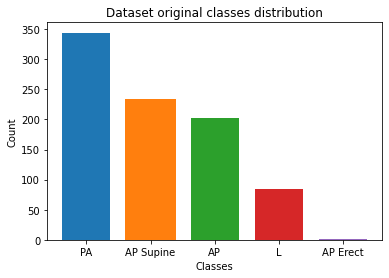
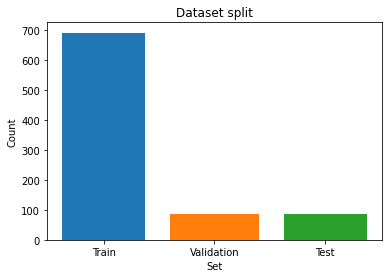

In [44]:
# Generate a model card document in HTML (default)
html_doc = mct.export_format()

# Display the model card document in HTML
display.display(display.HTML(html_doc))